## End to End ML Process on Mumbai Property data with TS

### Column Descriptions

| Column Name | Description |
|-------------|-------------|
| **ID** | A unique identifier for each property entry. |
| **Property Type** | Indicates the type of property, e.g., Residential or Commercial. |
| **Address Area** | The locality or neighborhood where the property is located (e.g., Borivali East, Juhu). |
| **Amenities** | List of features provided with the property such as Gym, Lift, Garden, Parking, etc. |
| **Property Age** | Number of years since the property was constructed. |
| **Carpet Area (sq.ft.)** | The usable floor area inside the apartment excluding the thickness of inner walls. |
| **Super Buildup Rate (per sq.ft.)** | Price per square foot including carpet area, walls, and shared areas like lobbies and staircases. |
| **Built-Up Area (sq.ft.)** | Carpet area plus the thickness of walls and other unusable areas inside the apartment. |
| **Area as per Approved Plan (sq.ft.)** | The total area approved by the municipal authority. |
| **Valuation Area (sq.ft.)** | The area used for calculating the property’s value, often equals built-up area. |
| **Super Built-up Area (sq.ft.)** | Total area including apartment plus proportionate share of common areas like corridors, lobbies, etc. |
| **Total Value (INR)** | Estimated market value of the property in Indian Rupees. It includes the built-up or super built-up area multiplied by the prevailing rate per square foot.|
| **No of Car Parks** | Number of car parking slots available with the property. |
| **Value of Car Park (INR)** | Value assigned to the car parking slots.  f = No of car parks * Rate per car park|
| **Final Value by Comparison Method (INR)** | Final estimated value using comparative market analysis with similar properties. |
| **Configuration** | Layout and number of rooms (e.g., 2BHK, 3BHK). |
| **Condition** | Current condition of the property (e.g., New, Renovated, Good, Average). |
| **Landmark** | Nearby major location (e.g., railway station, mall) used as a reference point. |
| **Landmark Distance (KM)** | Distance of the property from the landmark in kilometers. |
| **Last Sale Price (per sq.ft.)** | Price per square foot during the most recent sale. |
| **Last to Last Sale Price (per sq.ft.)** | Price per square foot during the sale before the most recent one. |
| **Last Sale Year** | Year of the last recorded sale. |
| **Last to Last Sale Year** | Year of the sale before the last one. |
| **Property Name** | Name or title of the property project or building. |
| **Rate 2021 (per sq.ft.)** | Market rate per square foot in the year 2021. |
| **Rate 2022 (per sq.ft.)** | Market rate per square foot in the year 2022. |
| **Rate 2023 (per sq.ft.)** | Market rate per square foot in the year 2023. |
| **Rate 2024 (per sq.ft.)** | Market rate per square foot in the year 2024. |
| **Rate 2025 (per sq.ft.)** | Predicted or current market rate per square foot for the year 2025. |


# Predict Super Built-Up Rate (per sq.ft.) on Mumbai Property

## 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Load and Preview Dataset

In [3]:
df = pd.read_csv("mumbai_property_data_with_TS.csv")
df.head()

,ID,Property Type,Address Area,Amenities,Property Age,Carpet Area (sq.ft.),Super Buildup Rate (per sq.ft.),Built-Up Area (sq.ft.),Area as per Approved Plan (sq.ft.),Valuation Area (sq.ft.),...,Last Sale Price (per sq.ft.),Last to Last Sale Price (per sq.ft.),Last Sale Year,Last to Last Sale Year,Property Name,Rate 2021 (per sq.ft.),Rate 2022 (per sq.ft.),Rate 2023 (per sq.ft.),Rate 2024 (per sq.ft.),Rate 2025 (per sq.ft.)
0,1,Residential,Borivali East,"Playground, Garden",15,709,21381.6,672,643,672,...,35606,35606,2011,2011,River Hts,18570,19885,18681,20138,21381.6
1,2,Residential,Borivali East,"Playground, Parking, Gym, Lift",6,1110,27342.0,1089,1067,1089,...,32697,32697,2020,2020,Moon Hights,27538,28632,30545,32100,27342.0
2,3,Residential,Malad East,"Garden, Swimming Pool",10,1130,26906.0,1102,1072,1102,...,24754,24754,2016,2016,Golden Vilas,24236,25576,23887,25103,26906.0
3,4,Residential,Juhu,"Playground, Garden, Lift",8,2166,57346.0,2120,2096,2120,...,53333,49114,2020,2018,Green Gdns,50907,54140,51208,54346,57346.0
4,5,Residential,Santacruz West,"Gym, Garden",3,2453,52827.0,2419,2403,2419,...,52791,52791,2023,2023,Santacruz West Res Apt,54514,57170,59357,51011,52827.0


### Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      10000 non-null  int64  
 1   Property Type                           10000 non-null  object 
 2   Address Area                            10000 non-null  object 
 3   Amenities                               10000 non-null  object 
 4   Property Age                            10000 non-null  int64  
 5   Carpet Area (sq.ft.)                    10000 non-null  int64  
 6   Super Buildup Rate (per sq.ft.)         10000 non-null  float64
 7   Built-Up Area (sq.ft.)                  10000 non-null  int64  
 8   Area as per Approved Plan (sq.ft.)      10000 non-null  int64  
 9   Valuation Area (sq.ft.)                 10000 non-null  int64  
 10  Super Built-up Area (sq.ft.)            10000 non-null  int

### Descriptive Statistics of data

In [5]:
df.describe()

,ID,Property Age,Carpet Area (sq.ft.),Super Buildup Rate (per sq.ft.),Built-Up Area (sq.ft.),Area as per Approved Plan (sq.ft.),Valuation Area (sq.ft.),Super Built-up Area (sq.ft.),Total Value (INR),No of Car Parks,...,Landmark Distance (KM),Last Sale Price (per sq.ft.),Last to Last Sale Price (per sq.ft.),Last Sale Year,Last to Last Sale Year,Rate 2021 (per sq.ft.),Rate 2022 (per sq.ft.),Rate 2023 (per sq.ft.),Rate 2024 (per sq.ft.),Rate 2025 (per sq.ft.)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,8.470000,1839.296900,43401.026200,1804.347000,1784.403700,1804.347000,1989.24700,8.716170e+07,1.991500,...,2.75355,43668.709300,43716.582200,2020.796400,2018.800300,41147.073400,41786.866800,42363.129900,42939.016500,43401.026200
std,2886.89568,4.006658,836.104156,19781.118387,836.174763,836.224245,836.174763,836.71046,7.307742e+07,0.817248,...,1.29824,20841.485444,21117.230002,3.150673,3.543258,18866.525085,19356.322419,19703.026583,19917.742304,19781.118387
min,1.00000,2.000000,450.000000,19920.800000,401.000000,376.000000,401.000000,551.00000,8.364347e+06,1.000000,...,0.50000,11080.000000,11080.000000,2011.000000,2011.000000,17533.000000,16447.000000,17457.000000,18519.000000,19920.800000
25%,2500.75000,5.000000,1149.000000,28271.000000,1113.000000,1093.000000,1113.000000,1298.00000,3.321713e+07,1.000000,...,1.60000,28139.000000,28208.000000,2019.000000,2016.000000,26629.750000,27351.750000,27429.000000,27634.500000,28271.000000
50%,5000.50000,8.000000,2002.000000,38963.000000,1960.500000,1936.500000,1960.500000,2118.00000,6.169614e+07,2.000000,...,2.70000,38412.500000,38387.500000,2022.000000,2019.000000,36754.500000,37274.500000,37416.500000,37809.000000,38963.000000
75%,7500.25000,12.000000,2493.250000,53218.000000,2459.250000,2439.000000,2459.250000,2647.00000,1.205506e+08,3.000000,...,3.90000,53722.750000,53877.000000,2023.000000,2022.000000,50705.750000,51048.000000,51413.500000,52436.500000,53218.000000
max,10000.00000,15.000000,3500.000000,118204.000000,3468.000000,3450.000000,3468.000000,3698.00000,4.036039e+08,3.000000,...,5.00000,159916.000000,159916.000000,2024.000000,2024.000000,119699.000000,124595.000000,130293.000000,133196.000000,118204.000000


### Shape of Data

In [6]:
print("Shape of Data")
df.shape

Shape of Data


(10000, 29)

### Correaltion Heatmap of all features

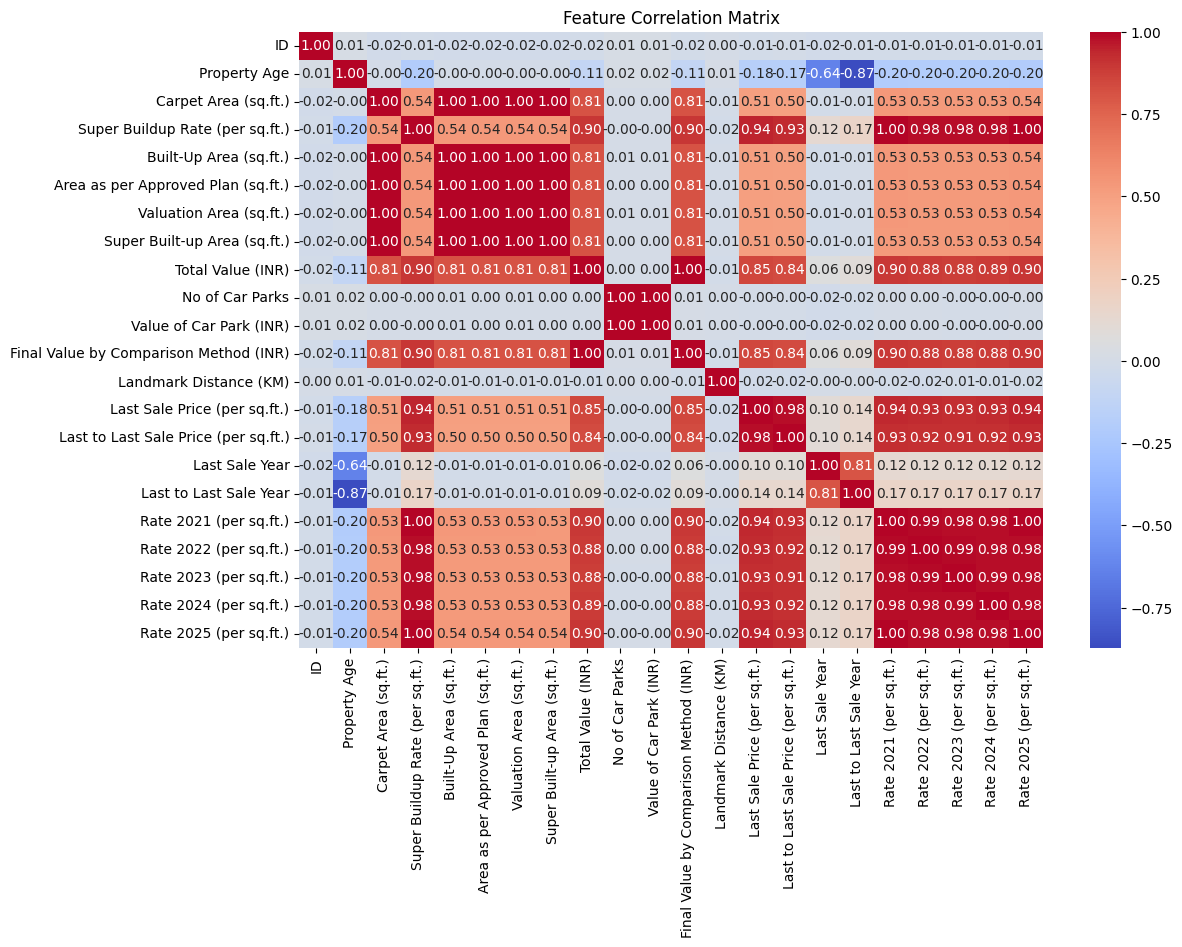

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

So, We can see that:

Here these features are highly coorelated with each other:

- because high positive correaltion > 0.8 : Carpet Area, Built-Up Area, Super Built-up Area, Valuation Area, Area as per Approved Plan

- because high positive correaltion > 0.9 : Rate 2021 to Rate 2025
- Final Value by Comparison vs Total Value, both are similar because correaltion is 1
- strong negative correlation < -0.6: Property Age vs Last Sale Year and Rate 202x

So, here is **multicollinearity** present

## 4. Data Cleaning 

#### Removed ID Col which is unncessary

In [8]:
df1 = df.drop('ID',axis=1, inplace=False)

In [9]:
df1.shape

(10000, 28)

#### Handling missing values

In [10]:
df1.isnull().sum().sum()

np.int64(0)

**no missing values**

#### Checking unique values in each columns

In [11]:
print("Checking unique values in each columns")
df1.nunique()

Checking unique values in each columns


Property Type                                1
Address Area                                11
Amenities                                  509
Property Age                                14
Carpet Area (sq.ft.)                      2217
Super Buildup Rate (per sq.ft.)           9034
Built-Up Area (sq.ft.)                    2288
Area as per Approved Plan (sq.ft.)        2304
Valuation Area (sq.ft.)                   2288
Super Built-up Area (sq.ft.)              2457
Total Value (INR)                         9996
No of Car Parks                              3
Value of Car Park (INR)                      3
Final Value by Comparison Method (INR)    9999
Configuration                                6
Condition                                    4
Landmark                                     6
Landmark Distance (KM)                      46
Last Sale Price (per sq.ft.)              9156
Last to Last Sale Price (per sq.ft.)      9188
Last Sale Year                              14
Last to Last 

#### Handling duplicated values

In [12]:
print("Checking duplicated values")
df1.duplicated().any()

Checking duplicated values


np.False_

**no duplicated values**

#### Dropping Valuation Area (sq.ft.) col because Valuation Area (sq.ft.) and Built-Up Area (sq.ft.) columns are same so we can say it's duplicate column but with different col names.

In [13]:
# Drop unnecessary col
df1.drop('Valuation Area (sq.ft.)', axis=1, inplace=True)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Property Type                           10000 non-null  object 
 1   Address Area                            10000 non-null  object 
 2   Amenities                               10000 non-null  object 
 3   Property Age                            10000 non-null  int64  
 4   Carpet Area (sq.ft.)                    10000 non-null  int64  
 5   Super Buildup Rate (per sq.ft.)         10000 non-null  float64
 6   Built-Up Area (sq.ft.)                  10000 non-null  int64  
 7   Area as per Approved Plan (sq.ft.)      10000 non-null  int64  
 8   Super Built-up Area (sq.ft.)            10000 non-null  int64  
 9   Total Value (INR)                       10000 non-null  float64
 10  No of Car Parks                         10000 non-null  int

### Finding How 'Final Value by Comparison Method (INR)' and 'Total Value (INR)' is Calculated

In [16]:
total_value = df1['Built-Up Area (sq.ft.)']  * df1['Super Buildup Rate (per sq.ft.)'] 
actual_total_value = df1['Total Value (INR)']
if total_value.round(2).equals(actual_total_value.round(2)):
    print('Built-Up Area (sq.ft.) * Super Buildup Rate (per sq.ft.) = Total Value (INR)')
else:
    print("not found")

Built-Up Area (sq.ft.) * Super Buildup Rate (per sq.ft.) = Total Value (INR)


##### Total Value (INR) = Built-Up Area (sq.ft.) * Super Buildup Rate (per sq.ft.) 

In [ ]:
final_value = df1['Total Value (INR)']  + df1['Value of Car Park (INR)'] 
actual_final_value = df1['Final Value by Comparison Method (INR)']
if final_value.equals(actual_final_value):
    print('Total Value + Value of Car Park = Final Value by Comparsion method')
else:
    print("not found")

Total Value + Value of Car Park = Final Value by Comparsion method


##### Total Value (INR) + Value of Car Park (INR) = Final Value by Comparison Method (INR)

## 5. Feature Engineering

### Categorical and Continuous features

In [ ]:
# categorical features
categorical_col = []
for column in df1:
    if df1[column].dtypes == 'object':
        categorical_col.append(column)
print(categorical_col)

# numerical features
numerical_col = []
for column in df1:
    if df1[column].dtypes != 'object':
        numerical_col.append(column)
numerical_col

['Property Type', 'Address Area', 'Amenities', 'Configuration', 'Condition', 'Landmark', 'Property Name']


['Property Age',
 'Carpet Area (sq.ft.)',
 'Super Buildup Rate (per sq.ft.)',
 'Built-Up Area (sq.ft.)',
 'Area as per Approved Plan (sq.ft.)',
 'Super Built-up Area (sq.ft.)',
 'Total Value (INR)',
 'No of Car Parks',
 'Value of Car Park (INR)',
 'Final Value by Comparison Method (INR)',
 'Landmark Distance (KM)',
 'Last Sale Price (per sq.ft.)',
 'Last to Last Sale Price (per sq.ft.)',
 'Last Sale Year',
 'Last to Last Sale Year',
 'Rate 2021 (per sq.ft.)',
 'Rate 2022 (per sq.ft.)',
 'Rate 2023 (per sq.ft.)',
 'Rate 2024 (per sq.ft.)',
 'Rate 2025 (per sq.ft.)']

### Checking Outliers 

using seaborn

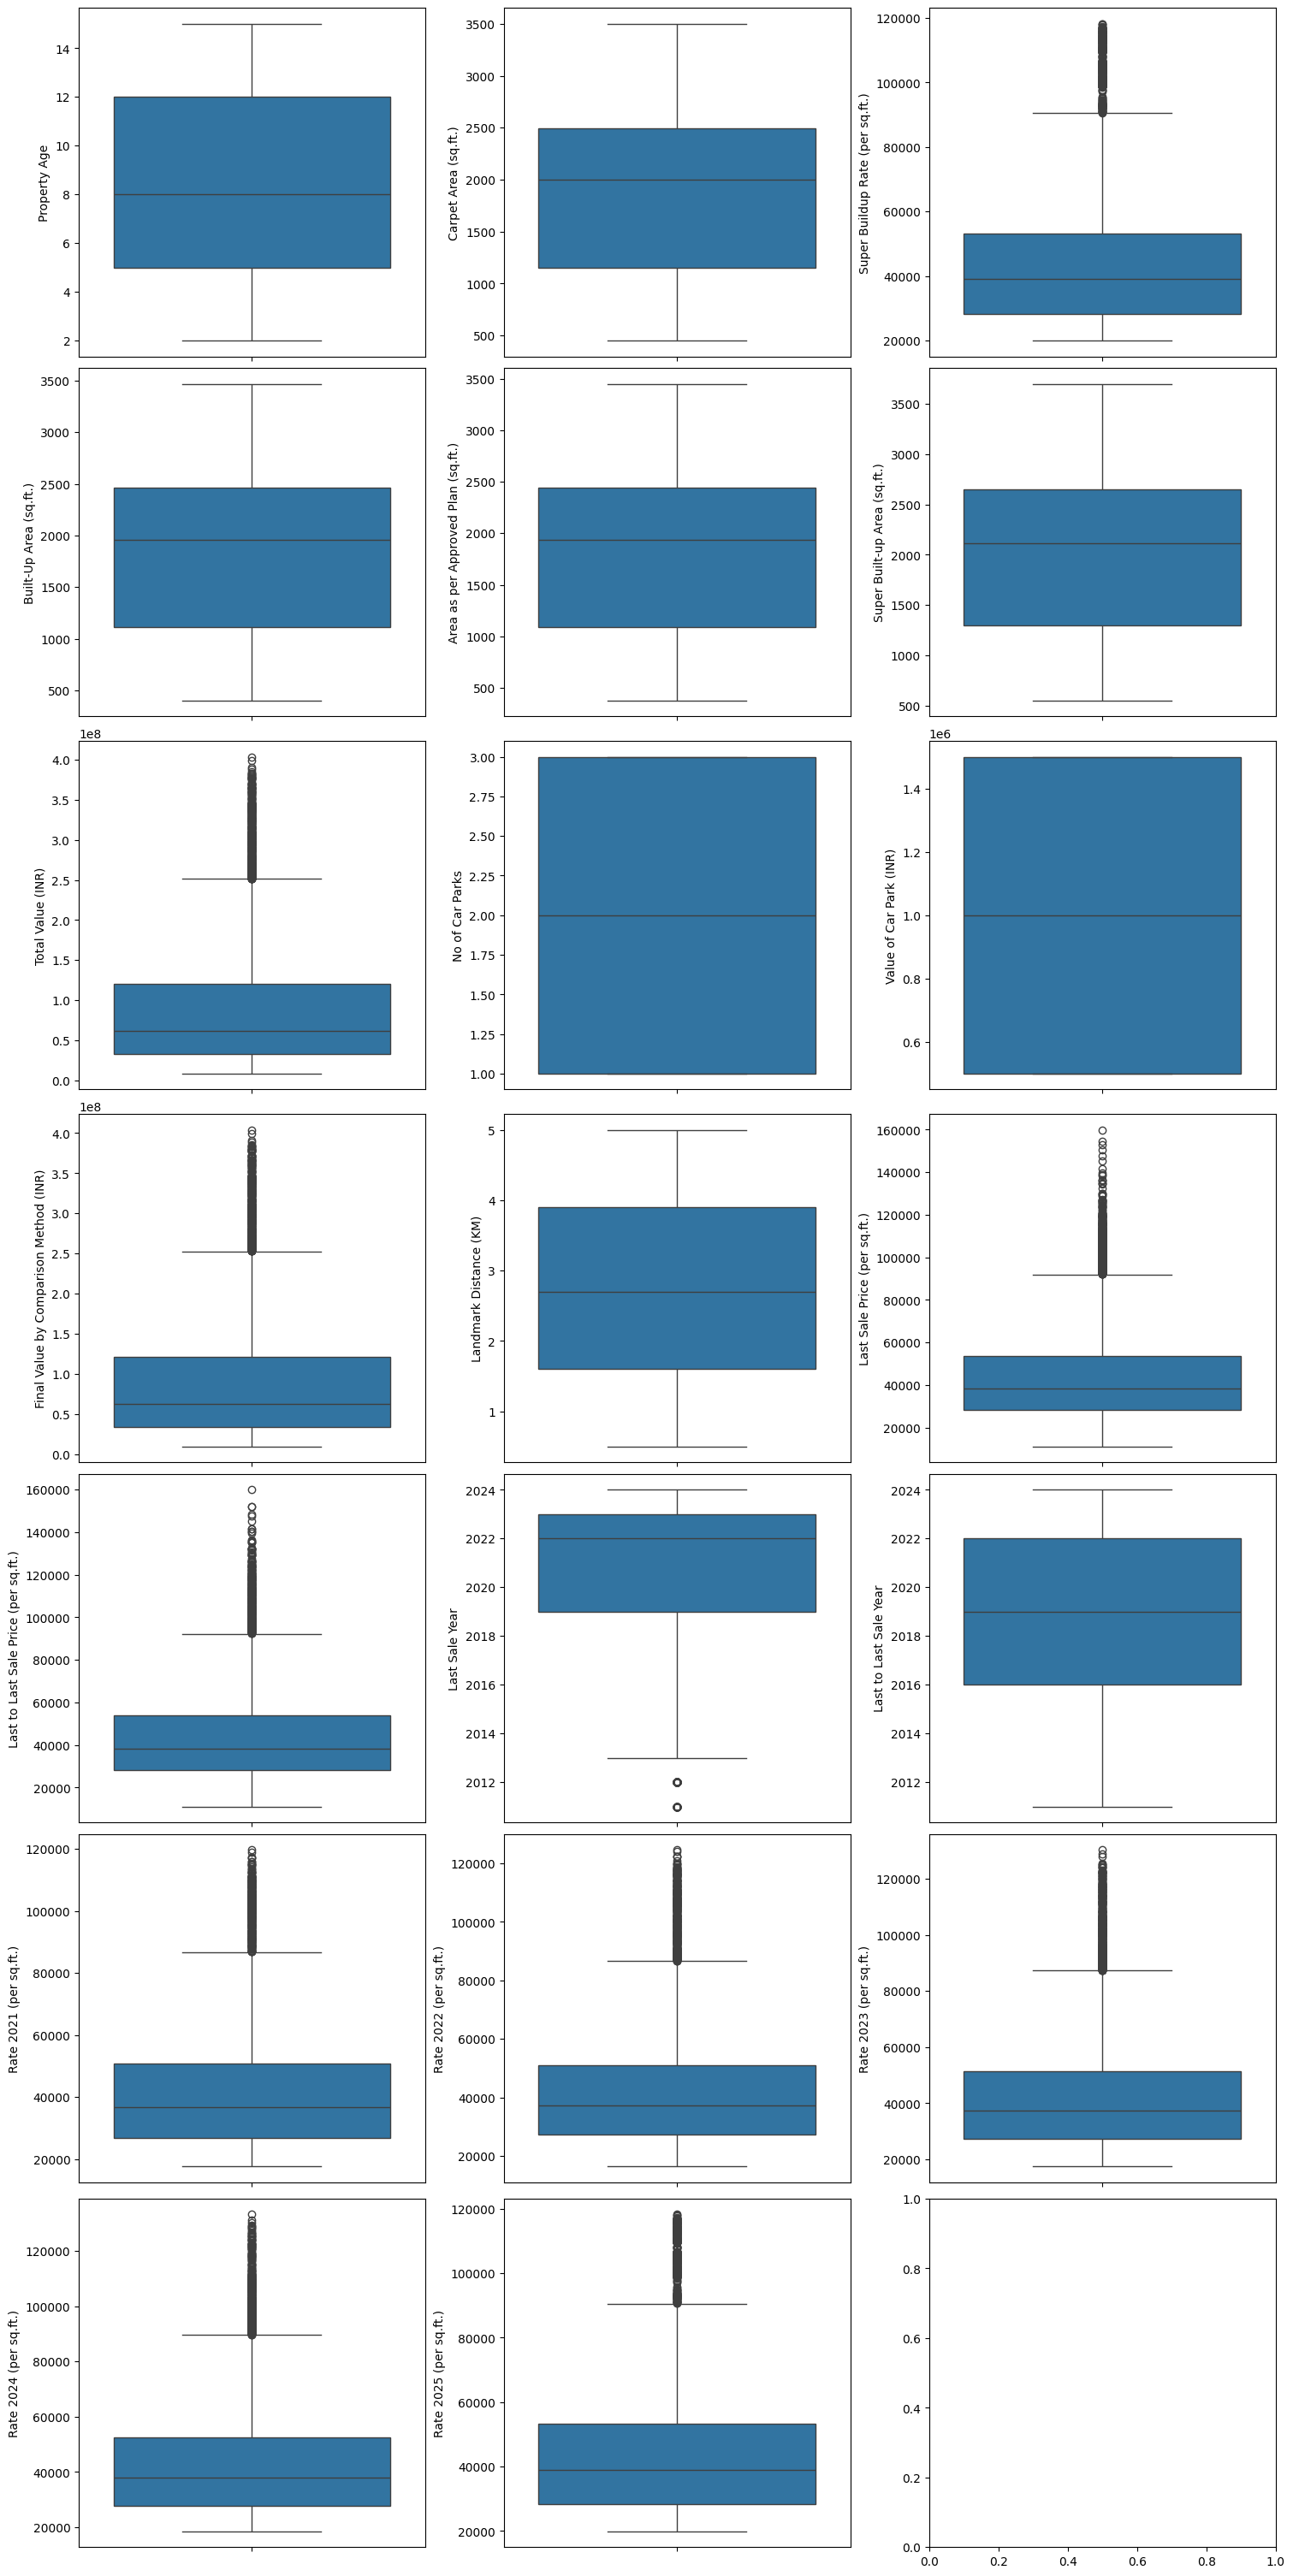

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,30), constrained_layout=True)

for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(df1[column], ax=ax)

using plotly

In [ ]:
fig = make_subplots(rows=7, cols=3, subplot_titles=numerical_col)

for i, column in enumerate(numerical_col):
    row = i // 3 + 1 
    col = i % 3 + 1 

    box_fig = px.box(df1, y=column)
    for trace in box_fig.data:
        fig.add_trace(trace, row=row, col=col)

fig.update_layout(height=3200, width=1200, showlegend=False)
fig.show()

#### Detecting Outliers using IQR method & Handling outliers using log transformation

In [ ]:
# detecting outliers
outlier_dict = {}
log_transformed_cols = []

for column in numerical_col:

    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)][column]

    if not outliers.empty:
        outlier_dict[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers': outliers.tolist()
        }

        # applying log transformation for handling outliers
        log_col_name = "log_"+ column 
        df1[log_col_name] = np.log1p(df1[column])
        log_transformed_cols.append(log_col_name)

# Display all columns where outliers were found
for col, details in outlier_dict.items():
    print(f"\nColumn: {col}")
    print(f"  Lower Bound: {details['Lower Bound']:.2f}")
    print(f"  Upper Bound: {details['Upper Bound']:.2f}")
    print(f"  Outliers: {details['Outliers']}")



Column: Super Buildup Rate (per sq.ft.)
  Lower Bound: -9149.50
  Upper Bound: 90638.50
  Outliers: [92854.0, 100374.0, 101636.0, 105146.0, 102852.0, 100384.0, 105396.0, 104692.0, 90945.6, 93420.8, 102424.0, 113338.0, 110008.0, 116682.0, 91915.2, 111724.0, 110738.0, 109964.0, 109882.0, 101082.0, 102248.0, 98816.0, 114426.0, 106544.0, 91828.8, 116548.0, 106626.0, 111590.0, 103212.0, 98922.0, 93244.0, 111382.0, 103894.0, 114728.0, 112358.0, 113688.0, 115810.0, 113336.0, 99740.0, 98856.0, 100378.0, 104192.0, 104420.0, 115066.0, 106668.0, 95454.0, 99708.0, 101784.0, 90739.2, 101784.0, 113982.0, 93048.0, 116502.0, 104602.0, 103326.0, 106366.0, 113466.0, 101494.0, 113404.0, 109716.0, 106502.0, 100200.0, 92976.0, 97628.0, 115212.0, 99928.0, 93856.0, 105312.0, 100998.0, 92222.0, 102072.0, 113702.0, 109488.0, 114660.0, 101838.0, 99466.0, 106432.0, 97336.0, 110074.0, 104574.0, 98858.0, 110276.0, 115868.0, 104222.0, 103440.0, 104474.0, 114230.0, 106118.0, 92094.4, 105640.0, 102300.0, 103558.0, 1

In [ ]:
log_transformed_cols

['log_Super Buildup Rate (per sq.ft.)',
 'log_Total Value (INR)',
 'log_Final Value by Comparison Method (INR)',
 'log_Last Sale Price (per sq.ft.)',
 'log_Last to Last Sale Price (per sq.ft.)',
 'log_Last Sale Year',
 'log_Rate 2021 (per sq.ft.)',
 'log_Rate 2022 (per sq.ft.)',
 'log_Rate 2023 (per sq.ft.)',
 'log_Rate 2024 (per sq.ft.)',
 'log_Rate 2025 (per sq.ft.)']

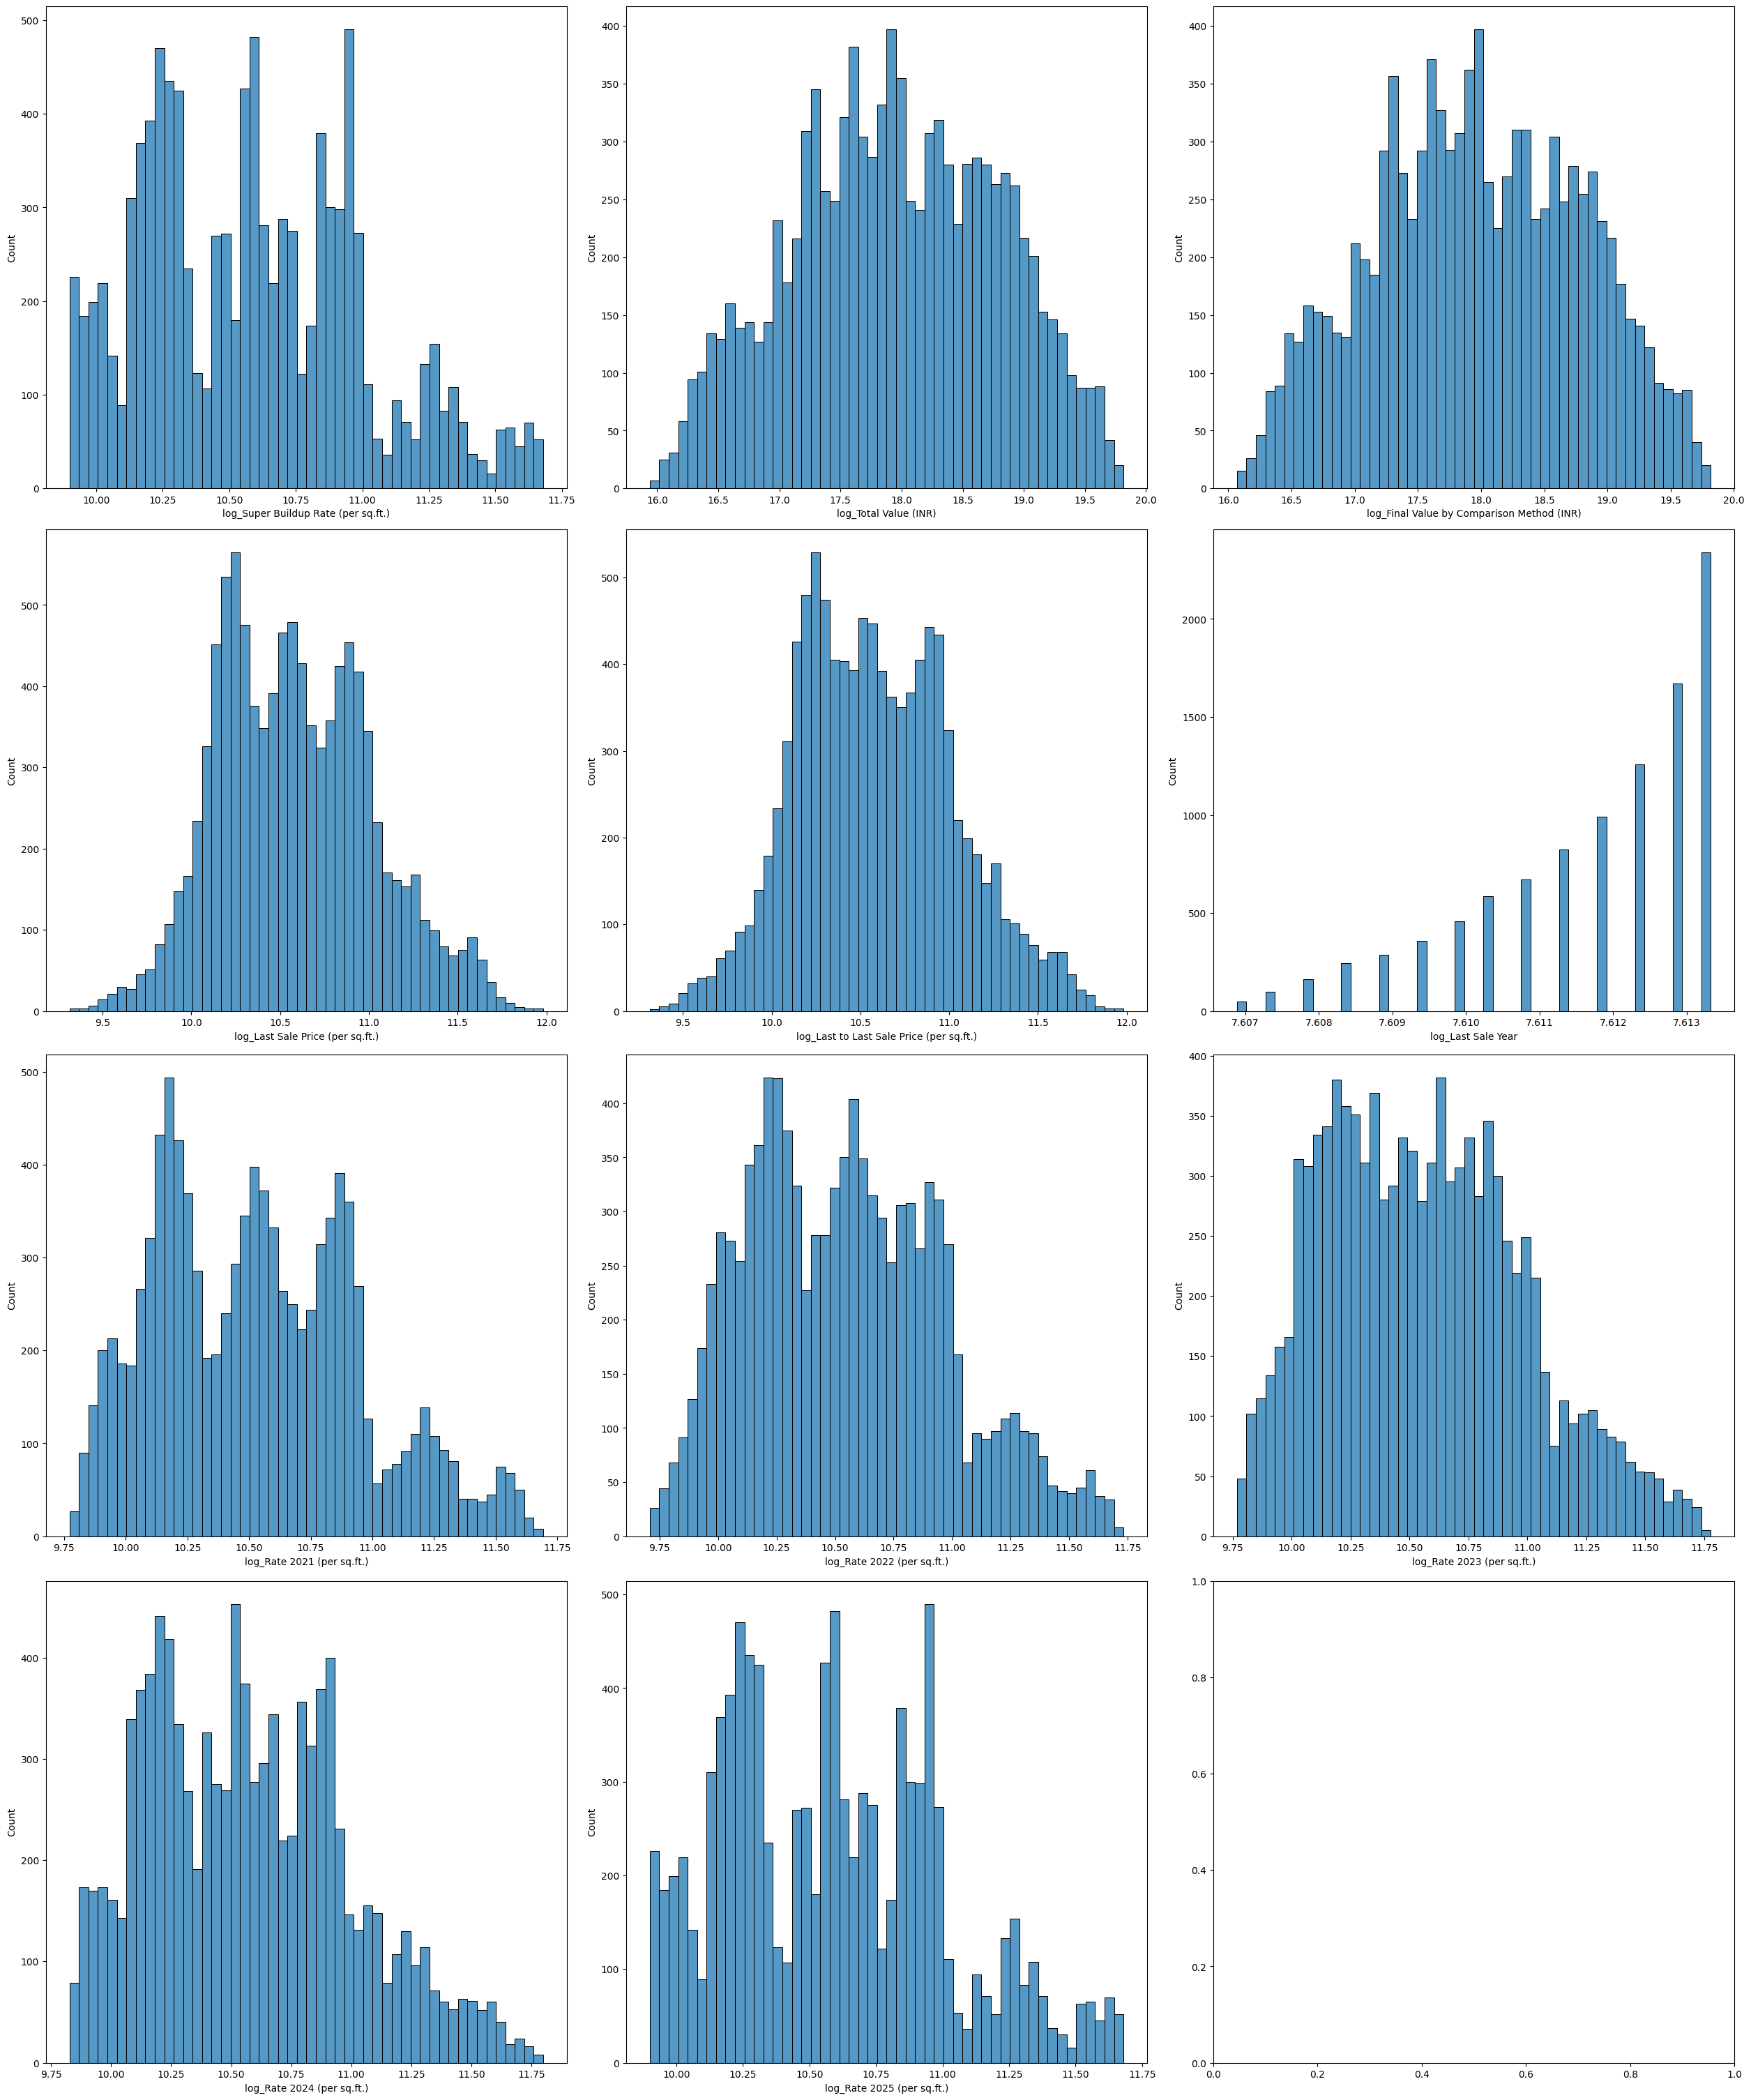

In [ ]:
# visualizing histplot for log_tranformed_cols
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,30), constrained_layout=True)

for ax, column in zip(axes.flatten(), log_transformed_cols):
    sns.histplot(df1[column], ax=ax, bins=50)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Type                               10000 non-null  object 
 1   Address Area                                10000 non-null  object 
 2   Amenities                                   10000 non-null  object 
 3   Property Age                                10000 non-null  int64  
 4   Carpet Area (sq.ft.)                        10000 non-null  int64  
 5   Super Buildup Rate (per sq.ft.)             10000 non-null  float64
 6   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 7   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 8   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 9   Total Value (INR)                           10000 non-null  float64
 10  No of Car P

#### Drop original columns because we are using log transformed columns

In [ ]:
FINAL_VALUE_COLUMN = 'Final Value by Comparison Method (INR)'
columns = df1[['Rate 2021 (per sq.ft.)', 'Rate 2022 (per sq.ft.)', 'Rate 2023 (per sq.ft.)', 'Rate 2024 (per sq.ft.)', 'Rate 2025 (per sq.ft.)', 'Total Value (INR)', FINAL_VALUE_COLUMN, 'Last Sale Price (per sq.ft.)', 'Last to Last Sale Price (per sq.ft.)', 'Last Sale Year']]
df1.drop(columns=columns, axis=1, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Type                               10000 non-null  object 
 1   Address Area                                10000 non-null  object 
 2   Amenities                                   10000 non-null  object 
 3   Property Age                                10000 non-null  int64  
 4   Carpet Area (sq.ft.)                        10000 non-null  int64  
 5   Super Buildup Rate (per sq.ft.)             10000 non-null  float64
 6   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 7   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 8   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 9   No of Car Parks                             10000 non-null  int64  
 10  Value of Ca

### Encode Categorical Variables

In [ ]:
categorical_col

['Property Type',
 'Address Area',
 'Amenities',
 'Configuration',
 'Condition',
 'Landmark',
 'Property Name']

In [ ]:
df1[categorical_col].head()

,Property Type,Address Area,Amenities,Configuration,Condition,Landmark,Property Name
0,Residential,Borivali East,"Playground, Garden",1BHK,Requires Renovation,Mall,River Hts
1,Residential,Borivali East,"Playground, Parking, Gym, Lift",2BHK,Good,Park,Moon Hights
2,Residential,Malad East,"Garden, Swimming Pool",2BHK,Fair,Park,Golden Vilas
3,Residential,Juhu,"Playground, Garden, Lift",4BHK,Fair,School,Green Gdns
4,Residential,Santacruz West,"Gym, Garden",4BHK,New,School,Santacruz West Res Apt


In [ ]:
df1[categorical_col].nunique()

Property Type       1
Address Area       11
Amenities         509
Configuration       6
Condition           4
Landmark            6
Property Name    1006
dtype: int64

In [ ]:
remove_cols = df1[['Property Type', 'Address Area', 'Property Name']]
df1.drop(columns=remove_cols, axis=1, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Amenities                                   10000 non-null  object 
 1   Property Age                                10000 non-null  int64  
 2   Carpet Area (sq.ft.)                        10000 non-null  int64  
 3   Super Buildup Rate (per sq.ft.)             10000 non-null  float64
 4   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 5   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 6   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 7   No of Car Parks                             10000 non-null  int64  
 8   Value of Car Park (INR)                     10000 non-null  int64  
 9   Configuration                               10000 non-null  object 
 10  Condition  

##### Remaining categorical columns which need to encode

Amenities        

Configuration       

Condition           

Landmark            

### Splitting values of Amenities column and storing in set

In [ ]:
df1['Amenity list'] = df1['Amenities'].apply(lambda x: x.split(', '))

In [ ]:
df1['Amenity list'].head()

0                [Playground, Garden]
1    [Playground, Parking, Gym, Lift]
2             [Garden, Swimming Pool]
3          [Playground, Garden, Lift]
4                       [Gym, Garden]
Name: Amenity list, dtype: object

In [ ]:
amenity_unique_val = set()

for i in df1['Amenity list']:
    amenity_unique_val.update(i)

amenity_unique_val

{'Garden', 'Gym', 'Lift', 'Parking', 'Playground', 'Swimming Pool'}

##### Manually performing one hot encoding for Amenities column

In [ ]:
for i in amenity_unique_val:
    df1['Amenity_' + i] = df1['Amenity list'].apply(lambda x: i in x)

# dropping Amenity list and original Amenities column
df1.drop('Amenity list', axis=1, inplace=True)
df1.drop('Amenities', axis=1, inplace=True)

In [ ]:
df1.head()

,Property Age,Carpet Area (sq.ft.),Super Buildup Rate (per sq.ft.),Built-Up Area (sq.ft.),Area as per Approved Plan (sq.ft.),Super Built-up Area (sq.ft.),No of Car Parks,Value of Car Park (INR),Configuration,Condition,...,log_Rate 2022 (per sq.ft.),log_Rate 2023 (per sq.ft.),log_Rate 2024 (per sq.ft.),log_Rate 2025 (per sq.ft.),Amenity_Swimming Pool,Amenity_Playground,Amenity_Parking,Amenity_Garden,Amenity_Gym,Amenity_Lift
0,15,709,21381.6,672,643,811,2,1000000,1BHK,Requires Renovation,...,9.897771,9.835316,9.910414,9.970333,False,True,False,True,False,False
1,6,1110,27342.0,1089,1067,1228,2,1000000,2BHK,Good,...,10.262315,10.326989,10.376642,10.216216,False,True,True,False,True,True
2,10,1130,26906.0,1102,1072,1298,2,1000000,2BHK,Fair,...,10.149449,10.081132,10.130782,10.200142,True,False,False,True,False,False
3,8,2166,57346.0,2120,2096,2300,3,1500000,4BHK,Fair,...,10.899347,10.843671,10.903145,10.956876,False,True,False,True,False,True
4,3,2453,52827.0,2419,2403,2649,1,500000,4BHK,New,...,10.953802,10.991342,10.839816,10.874797,False,False,False,True,True,False


In [ ]:
df1['Amenity_Gym'].dtype

dtype('bool')

In [ ]:
# convert all boolean columns to integers
amenity_cols = [col for col in df1.columns if col.startswith("Amenity_")]
df1[amenity_cols] = df1[amenity_cols].astype(int)

In [ ]:
df1['Amenity_Gym'].dtype

dtype('int64')

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc_col = ['Condition', 'Landmark', 'Configuration']
# onehot_enc_col = ['Property Type', 'Property Name', 'Address Area']  because removed
labelencoders = {}

for col in label_enc_col:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    labelencoders[col] = le

# df = pd.get_dummies(df, columns=onehot_enc_col, drop_first=False)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Age                                10000 non-null  int64  
 1   Carpet Area (sq.ft.)                        10000 non-null  int64  
 2   Super Buildup Rate (per sq.ft.)             10000 non-null  float64
 3   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 4   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 5   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 6   No of Car Parks                             10000 non-null  int64  
 7   Value of Car Park (INR)                     10000 non-null  int64  
 8   Configuration                               10000 non-null  int64  
 9   Condition                                   10000 non-null  int64  
 10  Landmark   

In [ ]:
df1.head()

,Property Age,Carpet Area (sq.ft.),Super Buildup Rate (per sq.ft.),Built-Up Area (sq.ft.),Area as per Approved Plan (sq.ft.),Super Built-up Area (sq.ft.),No of Car Parks,Value of Car Park (INR),Configuration,Condition,...,log_Rate 2022 (per sq.ft.),log_Rate 2023 (per sq.ft.),log_Rate 2024 (per sq.ft.),log_Rate 2025 (per sq.ft.),Amenity_Swimming Pool,Amenity_Playground,Amenity_Parking,Amenity_Garden,Amenity_Gym,Amenity_Lift
0,15,709,21381.6,672,643,811,2,1000000,0,3,...,9.897771,9.835316,9.910414,9.970333,0,1,0,1,0,0
1,6,1110,27342.0,1089,1067,1228,2,1000000,1,1,...,10.262315,10.326989,10.376642,10.216216,0,1,1,0,1,1
2,10,1130,26906.0,1102,1072,1298,2,1000000,1,0,...,10.149449,10.081132,10.130782,10.200142,1,0,0,1,0,0
3,8,2166,57346.0,2120,2096,2300,3,1500000,3,0,...,10.899347,10.843671,10.903145,10.956876,0,1,0,1,0,1
4,3,2453,52827.0,2419,2403,2649,1,500000,3,2,...,10.953802,10.991342,10.839816,10.874797,0,0,0,1,1,0


In [ ]:
df1[amenity_cols].sum().sort_values(ascending=False)

Amenity_Garden           5137
Amenity_Gym              5064
Amenity_Playground       5035
Amenity_Swimming Pool    4987
Amenity_Lift             4977
Amenity_Parking          4923
dtype: int64

#### Correlation of Independent features with target variable

In [ ]:
# columns = ['Amenity_Gym','Property Age', 'Carpet Area (sq.ft.)', 'Built-Up Area (sq.ft.)', 'Super Buildup Rate (per sq.ft.)', 'Area as per Approved Plan (sq.ft.)', 'Super Built-up Area (sq.ft.)', 'No of Car Parks', 'Value of Car Park (INR)']
# df1[columns].corrwith(df1['Super Buildup Rate (per sq.ft.)'], method='pearson')[:]   # 1st method (using list)
df1[df1.columns[0:30]].corrwith(df1['Super Buildup Rate (per sq.ft.)'], method='pearson')[:]   # 2nd method (using slicing)

Property Age                                 -0.199626
Carpet Area (sq.ft.)                          0.535390
Super Buildup Rate (per sq.ft.)               1.000000
Built-Up Area (sq.ft.)                        0.535177
Area as per Approved Plan (sq.ft.)            0.535208
Super Built-up Area (sq.ft.)                  0.535129
No of Car Parks                              -0.001381
Value of Car Park (INR)                      -0.001381
Configuration                                 0.580521
Condition                                    -0.094859
Landmark                                      0.011758
Landmark Distance (KM)                       -0.015671
Last to Last Sale Year                        0.169126
log_Super Buildup Rate (per sq.ft.)           0.969727
log_Total Value (INR)                         0.781089
log_Final Value by Comparison Method (INR)    0.784300
log_Last Sale Price (per sq.ft.)              0.908467
log_Last to Last Sale Price (per sq.ft.)      0.892183
log_Last S

## 6. Feature Selection

#### Selecting best features using Feature Selection Technique

In [ ]:
cols = df1[['Super Buildup Rate (per sq.ft.)', 'log_Super Buildup Rate (per sq.ft.)']]
X = df1.drop(columns=cols, axis=1)
y=df1['Super Buildup Rate (per sq.ft.)']

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Age                                10000 non-null  int64  
 1   Carpet Area (sq.ft.)                        10000 non-null  int64  
 2   Super Buildup Rate (per sq.ft.)             10000 non-null  float64
 3   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 4   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 5   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 6   No of Car Parks                             10000 non-null  int64  
 7   Value of Car Park (INR)                     10000 non-null  int64  
 8   Configuration                               10000 non-null  int64  
 9   Condition                                   10000 non-null  int64  
 10  Landmark   

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Property Age                                10000 non-null  int64  
 1   Carpet Area (sq.ft.)                        10000 non-null  int64  
 2   Built-Up Area (sq.ft.)                      10000 non-null  int64  
 3   Area as per Approved Plan (sq.ft.)          10000 non-null  int64  
 4   Super Built-up Area (sq.ft.)                10000 non-null  int64  
 5   No of Car Parks                             10000 non-null  int64  
 6   Value of Car Park (INR)                     10000 non-null  int64  
 7   Configuration                               10000 non-null  int64  
 8   Condition                                   10000 non-null  int64  
 9   Landmark                                    10000 non-null  int64  
 10  Landmark Di

### SelectKBest (automatic)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# select top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=11)
X_new = selector.fit_transform(X, y)

# To get selected column names
selected_features_sk = X.columns[selector.get_support()]
print(selected_features_sk)

Index(['Carpet Area (sq.ft.)', 'Configuration', 'log_Total Value (INR)',
       'log_Final Value by Comparison Method (INR)',
       'log_Last Sale Price (per sq.ft.)',
       'log_Last to Last Sale Price (per sq.ft.)',
       'log_Rate 2021 (per sq.ft.)', 'log_Rate 2022 (per sq.ft.)',
       'log_Rate 2023 (per sq.ft.)', 'log_Rate 2024 (per sq.ft.)',
       'log_Rate 2025 (per sq.ft.)'],
      dtype='object')


### Manual based on domain logic

In [ ]:
# manually selected features
features1 = df1[['Property Age','Super Built-up Area (sq.ft.)',
       'log_Total Value (INR)', 'Configuration',
       'log_Final Value by Comparison Method (INR)',    
       'log_Last Sale Price (per sq.ft.)',
       'log_Last to Last Sale Price (per sq.ft.)',
       'log_Rate 2021 (per sq.ft.)', 'log_Rate 2022 (per sq.ft.)',
       'log_Rate 2023 (per sq.ft.)', 'log_Rate 2024 (per sq.ft.)',
       'log_Rate 2025 (per sq.ft.)']]

# features2 = df1[['Carpet Area (sq.ft.)', 'Total Value (INR)', 'Configuration',
#        'log_Final Value by Comparison Method (INR)',
#        'log_Last Sale Price (per sq.ft.)',
#        'log_Last to Last Sale Price (per sq.ft.)',
#        'log_Rate 2021 (per sq.ft.)', 'log_Rate 2022 (per sq.ft.)',
#        'log_Rate 2023 (per sq.ft.)', 'log_Rate 2024 (per sq.ft.)',
#        'log_Rate 2025 (per sq.ft.)']]

In [ ]:
target = 'Super Buildup Rate (per sq.ft.)'

In [ ]:
# for col in selected_features_manually.columns:
#     plt.figure(figsize=(6, 4))
#     sns.scatterplot(data=df1, x=col, y=target)
#     plt.title(f'{col} vs {target}')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# manually selected features
X_features = features1

## 7. Data Scaling

In [ ]:
# using manual selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

## 8. Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

## 9. Model Training and Evaluation

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.coef_

array([ 2.74659011e+02,  2.69138954e+02, -7.01941743e+04,  6.92692957e+02,
        6.97669758e+04, -3.13480006e+01, -6.43339801e+01,  7.07967740e+02,
       -3.55481893e+02,  1.35430514e+01,  5.29471271e+02,  1.82210976e+04])

In [ ]:
# Print all coefficients with their feature index
for name, coef in zip(X_features.columns, model.coef_):
    print(f"{name} Coefficient: {coef:.2f}")

print(f"Intercept: {model.intercept_:.2f}")

Property Age Coefficient: 274.66
Super Built-up Area (sq.ft.) Coefficient: 269.14
log_Total Value (INR) Coefficient: -70194.17
Configuration Coefficient: 692.69
log_Final Value by Comparison Method (INR) Coefficient: 69766.98
log_Last Sale Price (per sq.ft.) Coefficient: -31.35
log_Last to Last Sale Price (per sq.ft.) Coefficient: -64.33
log_Rate 2021 (per sq.ft.) Coefficient: 707.97
log_Rate 2022 (per sq.ft.) Coefficient: -355.48
log_Rate 2023 (per sq.ft.) Coefficient: 13.54
log_Rate 2024 (per sq.ft.) Coefficient: 529.47
log_Rate 2025 (per sq.ft.) Coefficient: 18221.10
Intercept: 43453.43


### Model Evaluation using metrices MAE, MSE, RMSE, R2 Score

In [ ]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def print_evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
# Actual vs predicted value plot 
def plot_actual_vs_predicted(y_test, y_pred, model_name="Model"):
    """
    Plots Actual vs Predicted values for a regression model.

    Parameters:
    - y_test: True values 
    - y_pred: Predicted values from the model
    - model_name: name of the model 
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label='Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', label='Perfect Prediction (y = x)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Linear Regression\n')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Linear Regression

Test set evaluation:
_____________________________________
MAE: 3488.495726697813
MSE: 19537319.166605864
RMSE: 4420.103976899849
R2 Square 0.9450569358316377
__________________________________
Train set evaluation:
_____________________________________
MAE: 3551.5671077417364
MSE: 22238707.17353969
RMSE: 4715.793376892131
R2 Square 0.944822549362753
__________________________________


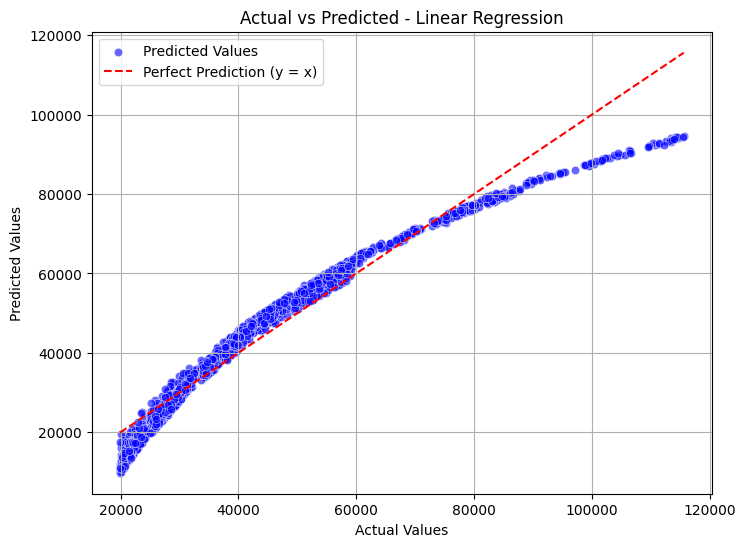

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Linear Regression')

**So, When we are using top 11 features selected by `SelectKBest` by sklearn then it give more error than manually selected features.**

### Scatterplot of selected features against the target to identify linear or non-linear relationship

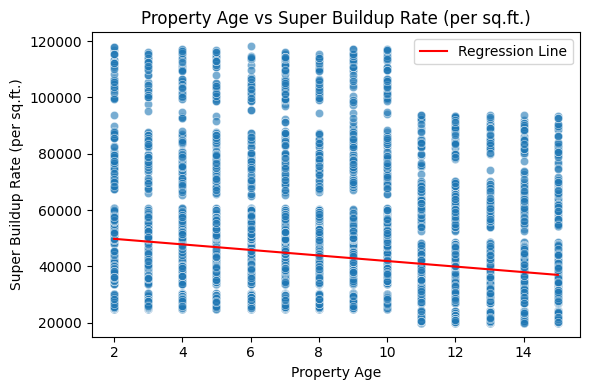

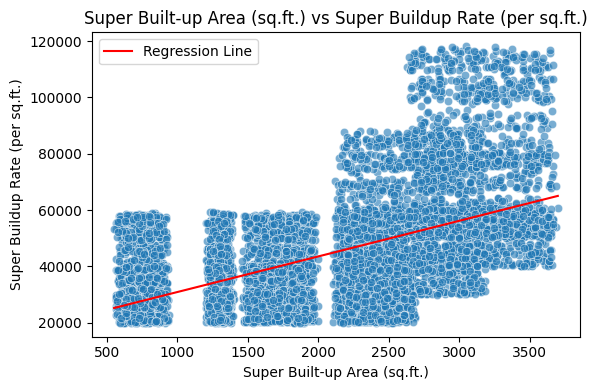

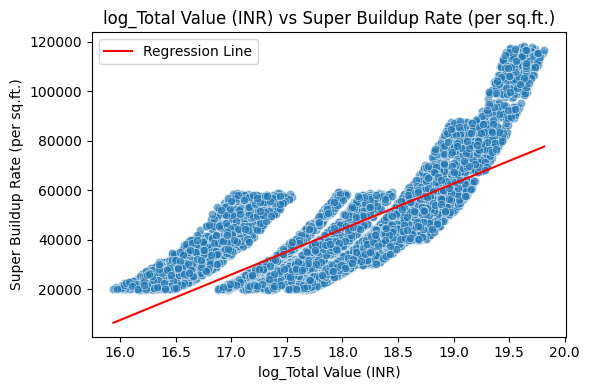

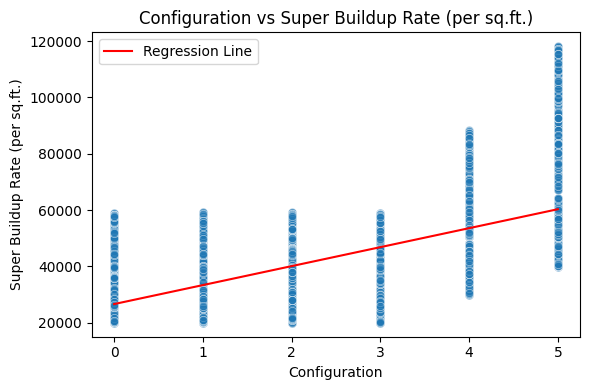

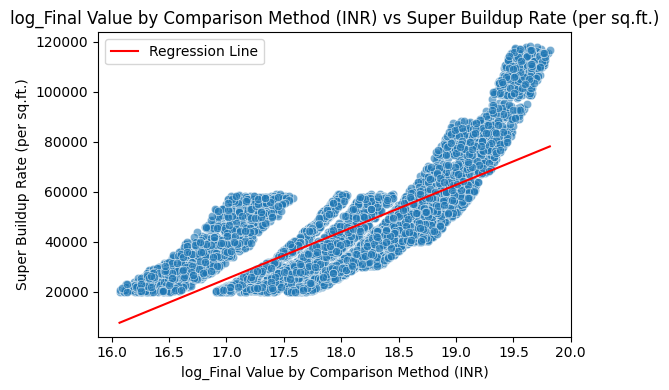

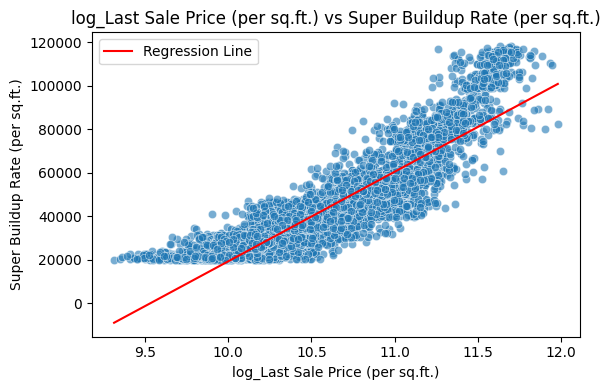

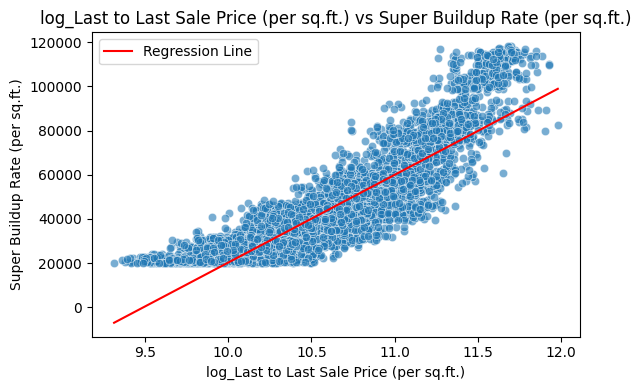

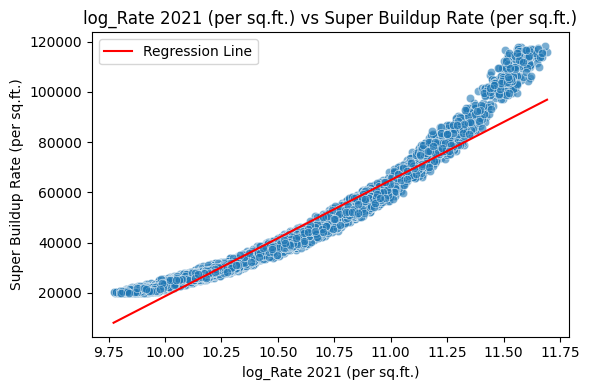

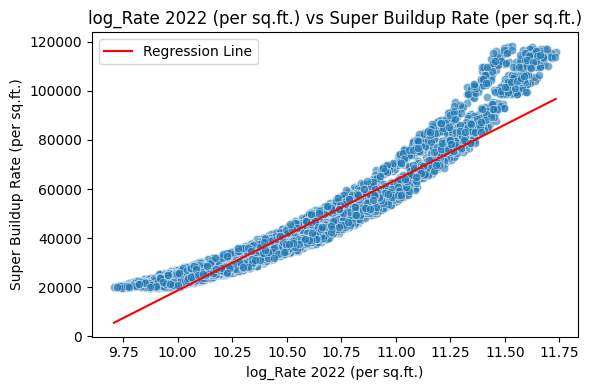

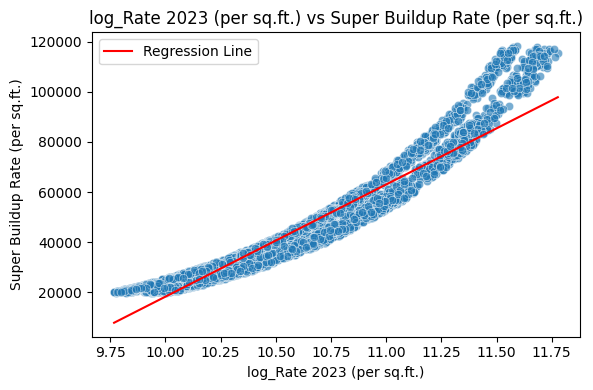

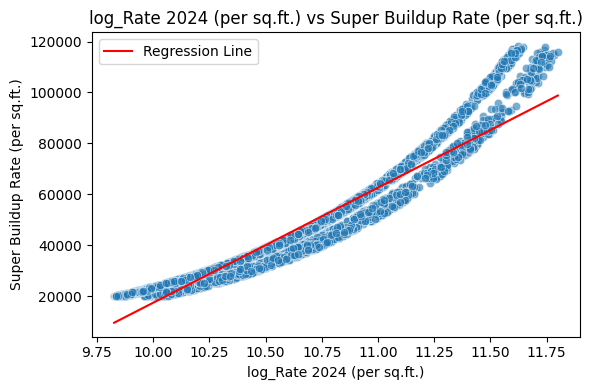

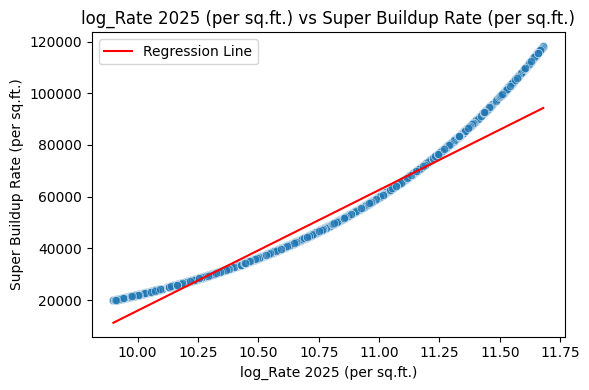

In [ ]:
for col in features1.columns:
    plt.figure(figsize=(6, 4))
    
    # Prepare data
    X_feature = df1[[col]].values  # 2D array for sklearn
    y_target = df1[target].values

    # Fit linear model
    reg = LinearRegression()
    reg.fit(X_feature, y_target)

    # Predict values for line
    x_range = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
    y_range_pred = reg.predict(x_range)

    # Plot
    sns.scatterplot(x=X_feature.ravel(), y=y_target, alpha=0.6)
    plt.plot(x_range, y_range_pred, color='red', label='Regression Line')

    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Polynomial transform with Linear Regression

In [ ]:
# pipeline - Polynomial transform + Linear Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linreg', LinearRegression())
])

# hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # degrees 1 through 4
}

# Grid search
grid = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

#  Predict with best model
best_poly_model = grid.best_estimator_
print("Best degree:", grid.best_params_['poly__degree'])

test_pred = best_poly_model.predict(X_test)
train_pred = best_poly_model.predict(X_train)

# Evaluate
print("Polynomial Transform with Linear Regression\n")
print('Test set evaluation:\n' + '_'*40)
print_evaluate(y_test, test_pred)

print('='*40)
print('Train set evaluation:\n' + '_'*40)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Transform with Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Best degree: 4
Polynomial Transform with Linear Regression

Test set evaluation:
________________________________________
MAE: 4.732072644210531
MSE: 44.16590627117666
RMSE: 6.645743470160179
R2 Square 0.9999998757961519
__________________________________
Train set evaluation:
________________________________________
MAE: 3.380778839833679
MSE: 21.58137385523237
RMSE: 4.645575729146214
R2 Square 0.9999999464534884
__________________________________


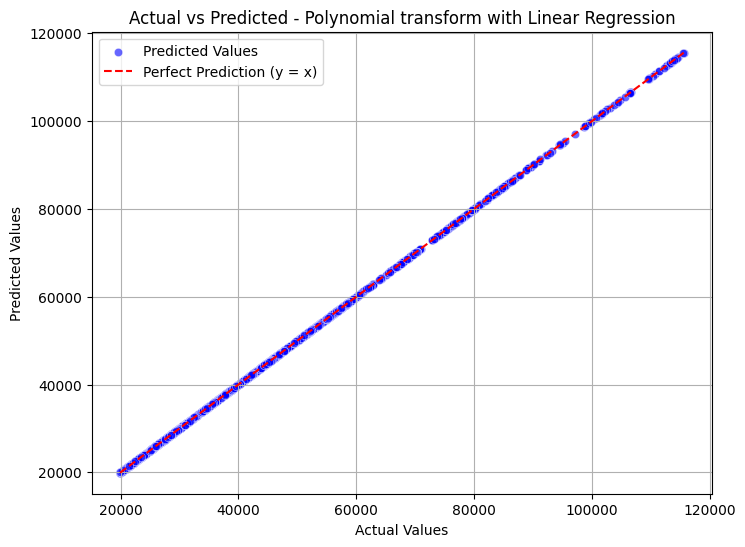

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Polynomial transform with Linear Regression')

### ElasticNet with Hyperparameter Tuning 

In [ ]:
# Pipeline: Polynomial + ElasticNet
elastic_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('elastic_reg', ElasticNet(max_iter=5000))  
])

# Grid: tune polynomial degree and ElasticNet alpha/l1_ratio
param_grid = {
    'poly__degree': [1, 2, 3],
    'elastic_reg__alpha': [0.1, 1.0],
    'elastic_reg__l1_ratio': [0.1, 0.5, 0.9]  # 0.1 = more Ridge, 0.9 = more Lasso
}

grid = GridSearchCV(estimator=elastic_pipeline,
                    param_grid=param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=3,
                    n_jobs=-1,
                    verbose=2)

grid.fit(X_train, y_train)

# Best model
best_elastic_model = grid.best_estimator_
print("Best degree:", grid.best_params_['poly__degree'])
print("Best alpha:", grid.best_params_['elastic_reg__alpha'])
print("Best l1_ratio:", grid.best_params_['elastic_reg__l1_ratio'])

# Predict
test_pred = best_elastic_model.predict(X_test)
train_pred = best_elastic_model.predict(X_train)

# Evaluate
print("ElasticNet Regression (Polynomial)\n")
print('Test set evaluation:\n' + '_'*40)
print_evaluate(y_test, test_pred)
print('='*40)
print('Train set evaluation:\n' + '_'*40)
print_evaluate(y_train, train_pred)

# results
results_df_2 = pd.DataFrame(data=[["ElasticNet Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best degree: 3
Best alpha: 0.1
Best l1_ratio: 0.9
ElasticNet Regression (Polynomial)

Test set evaluation:
________________________________________
MAE: 366.9617343555656
MSE: 258343.94112377186
RMSE: 508.2754579199864
R2 Square 0.9992734823230542
__________________________________
Train set evaluation:
________________________________________
MAE: 364.2846710680717
MSE: 255841.09555007852
RMSE: 505.8073700037184
R2 Square 0.999365221219447
__________________________________


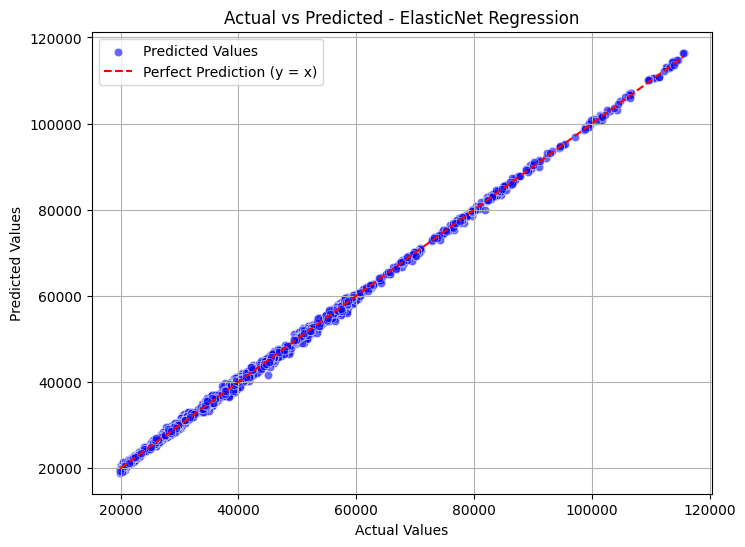

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='ElasticNet Regression')

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic_reg__alpha,param_elastic_reg__l1_ratio,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022425,0.002396,0.003355,0.000950,0.1,0.1,1,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-5147.526988,-5197.876326,-5110.867712,-5152.090342,35.667379,15
1,5.404121,0.997656,0.009018,0.001142,0.1,0.1,2,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-1581.627948,-1540.365729,-1622.184480,-1581.392719,33.402780,7
2,50.189871,2.293478,0.025984,0.001646,0.1,0.1,3,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-1048.423381,-999.957557,-1063.015970,-1037.132303,26.953135,4
3,0.028526,0.004030,0.003186,0.000828,0.1,0.5,1,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-5069.021234,-5128.532121,-5035.644749,-5077.732701,38.418166,14
4,5.052924,0.061382,0.007895,0.000125,0.1,0.5,2,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-1400.995383,-1373.096755,-1438.164784,-1404.085641,26.653635,6
5,48.719054,1.069311,0.028590,0.003470,0.1,0.5,3,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-865.391131,-815.847543,-890.471203,-857.236626,31.005855,2
6,0.050365,0.003291,0.004532,0.000902,0.1,0.9,1,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-4910.188279,-4977.424246,-4867.637754,-4918.416760,45.196234,13
7,7.509122,0.201715,0.008090,0.001836,0.1,0.9,2,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-966.519350,-971.493942,-977.729390,-971.914227,4.586119,3
8,48.984539,1.715166,0.017214,0.005312,0.1,0.9,3,"{'elastic_reg__alpha': 0.1, 'elastic_reg__l1_r...",-517.801620,-488.971126,-536.503830,-514.425525,19.551436,1
9,0.015674,0.002028,0.002411,0.000559,1.0,0.1,1,"{'elastic_reg__alpha': 1.0, 'elastic_reg__l1_r...",-5876.654314,-5841.790387,-5808.036339,-5842.160347,28.014392,18


### Support Vector Regression

In [ ]:
svm_pipeline = Pipeline([
    ('svr_reg', SVR())
])

# hyperparameter grid
param_grid = {
    'svr_reg__kernel': ['rbf', 'linear'],  
    'svr_reg__gamma': ['scale', 'auto'],
    'svr_reg__C': [1.0]
}

# Grid search
grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

#  Predict with best model
best_svm_model = grid.best_estimator_
print("Best kernel:", grid.best_params_['svr_reg__kernel'])
print("Best gamma:", grid.best_params_['svr_reg__gamma'])

test_pred = best_svm_model.predict(X_test)
train_pred = best_svm_model.predict(X_train)

# Evaluate
print("Support Vector Regression\n")
print('Test set evaluation:\n' + '_'*40)
print_evaluate(y_test, test_pred)

print('='*40)
print('Train set evaluation:\n' + '_'*40)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Support Vector Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best kernel: linear
Best gamma: scale
Support Vector Regression

Test set evaluation:
________________________________________
MAE: 3488.1956139562712
MSE: 39166292.895189345
RMSE: 6258.297923172829
R2 Square 0.8898561196944861
__________________________________
Train set evaluation:
________________________________________
MAE: 3767.6997159084185
MSE: 48912926.32420428
RMSE: 6993.777686215389
R2 Square 0.8786399516520319
__________________________________


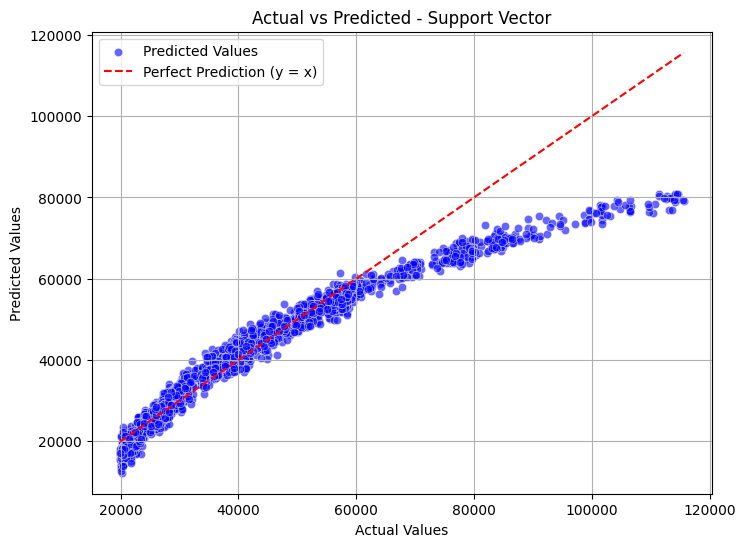

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Support Vector')

### Random Forest Regression

In [ ]:
rf = RandomForestRegressor(random_state=42)

# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],       # number of trees in the forest
    'max_depth': [10, 20],      # depth of each tree
    'min_samples_split': [2],      # min samples to split a node
    'min_samples_leaf': [1],       # min samples at a leaf node
}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, 
                    cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predictions
test_pred = best_rf.predict(X_test)
train_pred = best_rf.predict(X_train)

# Evaluation
print("Random Forest Regression\n")
print('Test set evaluation:\n' + '_'*40)
print_evaluate(y_test, test_pred)

print('='*40)
print('Train set evaluation:\n' + '_'*40)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regression

Test set evaluation:
________________________________________
MAE: 8.266586800000447
MSE: 641.4929253204192
RMSE: 25.327710621381065
R2 Square 0.9999981959865292
__________________________________
Train set evaluation:
________________________________________
MAE: 3.7264559999998923
MSE: 130.0775481459436
RMSE: 11.405154455155072
R2 Square 0.9999996772587797
__________________________________


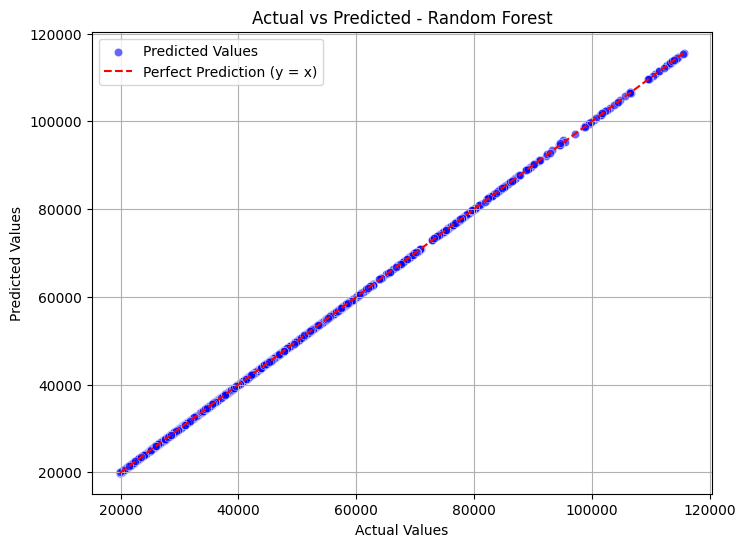

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Random Forest')

### Decision Tree Regression

In [ ]:
dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', min_samples_split=2, min_samples_leaf=1, max_depth=10, random_state=1)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(features1, y, test_size=0.30, random_state=1)
dt.fit(X_trainn, y_trainn)

# Predict
test_pred = dt.predict(X_testt)
train_pred = dt.predict(X_trainn)

# Evaluate
print("Decision Tree Regression\n")
print('Test set evaluation:\n___________________________________________')
print_evaluate(y_testt, test_pred)

print('================================')
print('Train set evaluation:\n___________________________________________')
print_evaluate(y_trainn, train_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree Regression", *evaluate(y_testt, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Decision Tree Regression

Test set evaluation:
___________________________________________
MAE: 25.419340961098346
MSE: 5526.536413175957
RMSE: 74.34067805162903
R2 Square 0.9999855900052729
__________________________________
Train set evaluation:
___________________________________________
MAE: 14.694984563071007
MSE: 376.9709515488479
RMSE: 19.41573978886326
R2 Square 0.9999990441602984
__________________________________


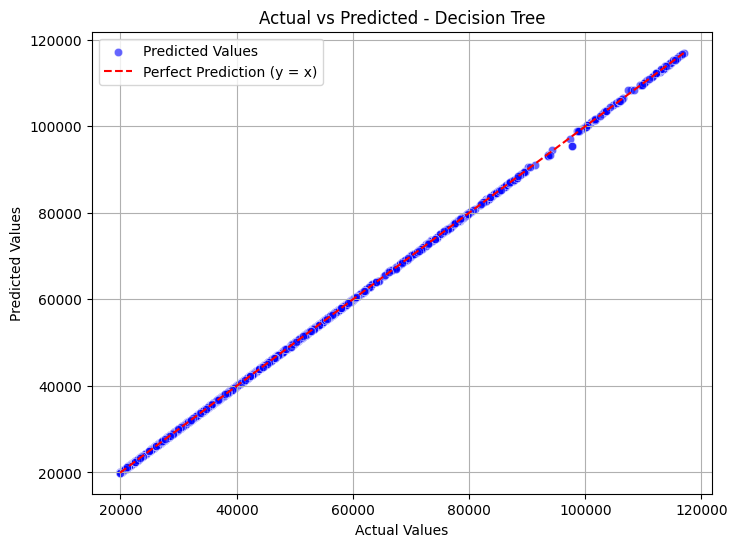

In [ ]:
plot_actual_vs_predicted(y_testt, test_pred, model_name='Decision Tree')

### Polynomial transform with Ridge Regression

In [ ]:
# pipeline - Polynomial transform + ridge Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge_reg', Ridge(solver='auto'))
])

# hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # degrees 1 through 4
    'ridge_reg__alpha': [0.1, 0.5, 1.0, 10],
}

# Grid search
grid = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

#  Predict with best model
best_poly_model = grid.best_estimator_
print("Best degree:", grid.best_params_['poly__degree'])
print("Best alpha:", grid.best_params_['ridge_reg__alpha'])

test_pred = best_poly_model.predict(X_test)
train_pred = best_poly_model.predict(X_train)

# Evaluate
print("Polynomial Transform with Ridge Regression")
print('Test set evaluation:\n' + '_'*40)
print_evaluate(y_test, test_pred)

print('='*40)
print('Train set evaluation:\n' + '_'*40)
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Transform with Ridge Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Best degree: 4
Best alpha: 0.1
Polynomial Transform with Ridge Regression
Test set evaluation:
________________________________________
MAE: 11.220796514528091
MSE: 247.3960918892254
RMSE: 15.72882995932073
R2 Square 0.9999993042699853
__________________________________
Train set evaluation:
________________________________________
MAE: 10.222029037791867
MSE: 206.80031174332953
RMSE: 14.3805532488611
R2 Square 0.9999994868985007
__________________________________


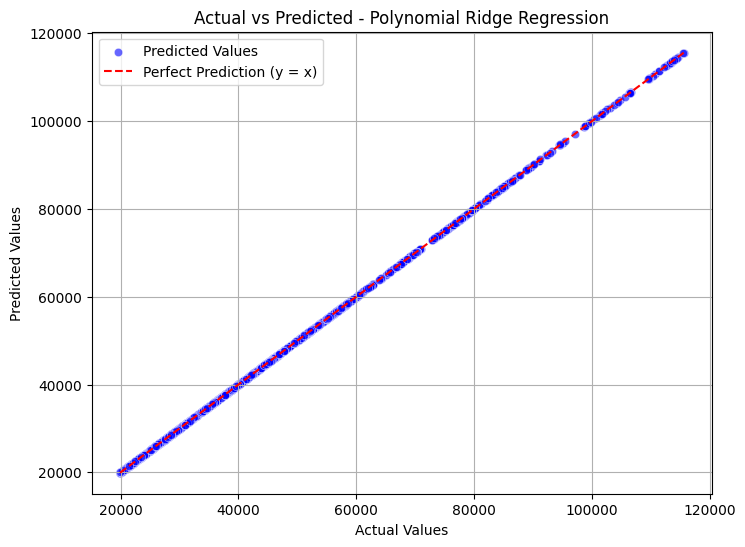

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Polynomial Ridge Regression')

### Ridge Regression

In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10, 100]}

ridge_model = Ridge()
grid = GridSearchCV(ridge_model, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Ridge alpha:", grid.best_params_)

Best Ridge alpha: {'alpha': 0.1}


In [ ]:
# Best alpha from GridSearchCV
best_alpha = 0.1
ridge_model = Ridge(alpha=best_alpha, solver='cholesky', random_state=42)

# Train ridge reg model
ridge_model.fit(X_train, y_train)

# Predict
test_pred1 = ridge_model.predict(X_test)
train_pred1 = ridge_model.predict(X_train)

# Evaluate
print("Ridge Regression\n")
print('Test set evaluation:\n___________________________________________')
print_evaluate(y_test, test_pred1)

print('================================')
print('Train set evaluation:\n___________________________________________')
print_evaluate(y_train, train_pred1)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred1)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Ridge Regression

Test set evaluation:
___________________________________________
MAE: 3491.6060049799657
MSE: 19537143.564602442
RMSE: 4420.0841128424745
R2 Square 0.9450574296615261
__________________________________
Train set evaluation:
___________________________________________
MAE: 3551.664831192218
MSE: 22250125.912858177
RMSE: 4717.003912745693
R2 Square 0.9447942178181102
__________________________________


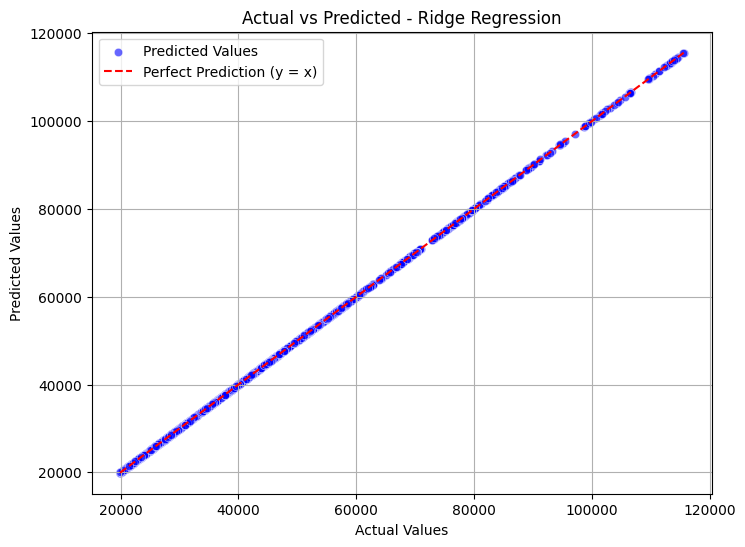

In [ ]:
plot_actual_vs_predicted(y_test, test_pred, model_name='Ridge Regression')

## Final Results

In [ ]:
# sorted results
from IPython.display import display
results_df_sorted = results_df.sort_values(by=['RMSE', 'R2 Square'], ascending=[True, False])
display(results_df_sorted.reset_index(drop=True))

,Model,MAE,MSE,RMSE,R2 Square
0,Polynomial Transform with Linear Regression,4.732073,4.416591e+01,6.645743,1.000000
1,Polynomial Transform with Ridge Regression,11.220797,2.473961e+02,15.728830,0.999999
2,Random Forest Regression,8.266587,6.414929e+02,25.327711,0.999998
3,Decision Tree Regression,25.419341,5.526536e+03,74.340678,0.999986
4,ElasticNet Regression,366.961734,2.583439e+05,508.275458,0.999273
5,Ridge Regression,3491.606005,1.953714e+07,4420.084113,0.945057
6,Linear Regression,3488.495727,1.953732e+07,4420.103977,0.945057
7,Support Vector Regression,3488.195614,3.916629e+07,6258.297923,0.889856


<Axes: ylabel='Model'>

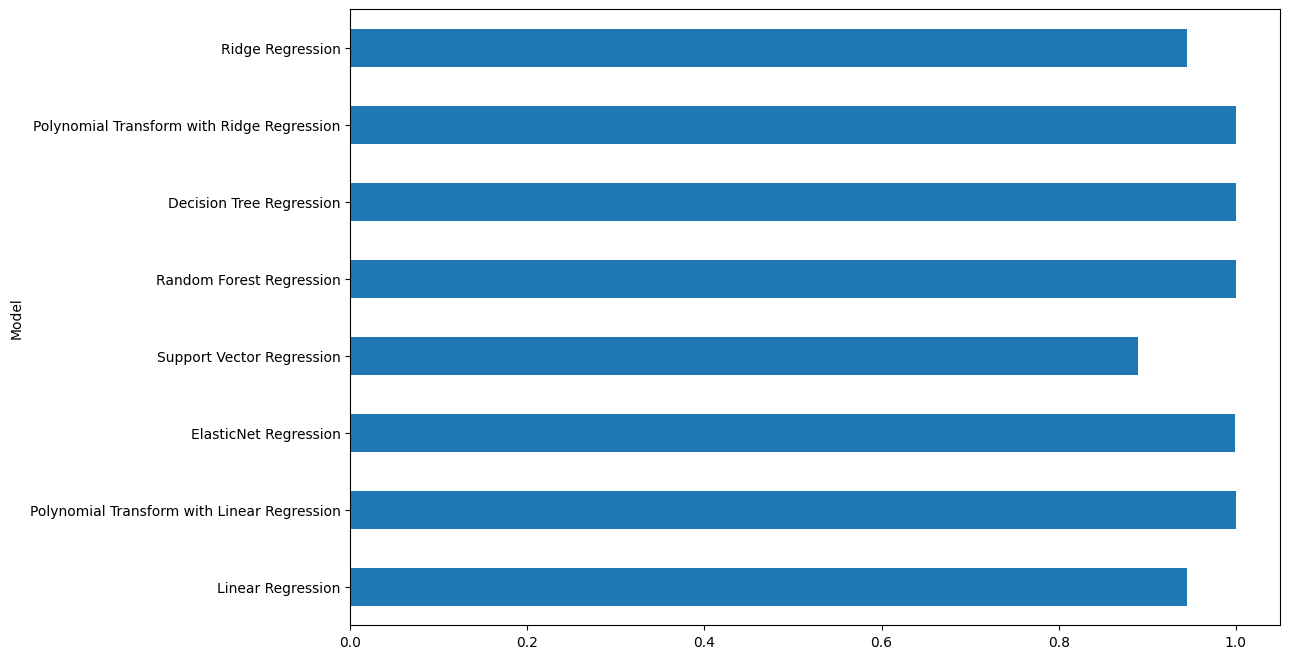

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))